In [3]:
import pandas as pd
import numpy as np


In [4]:
counts_sex_age_state = pd.read_csv('cdc_death_counts_by_sex_age_state.csv')
counts_sex_age_state.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,All Ages,974282.0,7520550.0,855731.0,504882.0,10684.0,1334231.0,NaN
1,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,Under 1 year,242.0,41777.0,495.0,28.0,28.0,736.0,NaN
2,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,0-17 years,933.0,74176.0,1460.0,252.0,204.0,2342.0,NaN
3,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,1-4 years,113.0,7791.0,293.0,29.0,70.0,447.0,NaN
4,03/23/2022,01/01/2020,03/19/2022,By Total,NaN,NaN,United States,All Sexes,5-14 years,296.0,12438.0,424.0,96.0,82.0,705.0,NaN


jan - winter
feb - winter
march - spring
april- spring
may - spring
june - summer
july- summer
aug -summer
sept -fall
oct -fall
nov - fall
dec - winter

radomly pick 3 csvs from each month and group by season 

In [17]:
import os
import random


# Define the seasons
seasons = {
    'jan': 'winter', 'feb': 'winter', 'mar': 'spring', 'apr': 'spring',
    'may': 'spring', 'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
    'sep': 'fall', 'oct': 'fall', 'nov': 'fall', 'dec': 'winter'
}

# Set the directory path where the CSVs are stored
directory = './datasets/csse_covid_19_daily_reports_us'

# Create a dictionary to store selected CSVs by month
selected_csvs_by_month = {month: [] for month in seasons.keys()}

# List all files in the directory
files = os.listdir(directory)

# Iterate through files and group them by month
for file in files:
    for month in seasons.keys():
        if month in file.lower() and file.endswith('.csv'):
            selected_csvs_by_month[month].append(file)

# Randomly select three CSVs from each month
selected_csvs = {month: random.sample(csvs, min(3, len(csvs))) for month, csvs in selected_csvs_by_month.items()}

# Group selected CSVs by season
seasonal_data = {season: [] for season in set(seasons.values())}

for month, csvs in selected_csvs.items():
    season = seasons[month]
    seasonal_data[season].extend(csvs)

# Print the grouped data
for season, csvs in seasonal_data.items():
    print(f'Season: {season}')
    for csv in csvs:
        print(f'  {csv}')

# Create an empty dictionary to store dataframes by season
dataframes_by_season = {season: [] for season in set(seasons.values())}

# Load the selected CSVs into dataframes
for season, csvs in selected_csvs.items():
    for csv in csvs:
        # Construct the file path
        file_path = os.path.join(directory, csv)
        
        # Load CSV into a dataframe
        df = pd.read_csv(file_path)
        
        # Append dataframe to the corresponding season
        dataframes_by_season[season].append(df)



Season: fall
Season: spring
Season: summer
Season: winter


In [24]:
import os
import random
import pandas as pd

# Define the seasons
seasons = {
    '01': 'winter', '02': 'winter', '03': 'spring', '04': 'spring',
    '05': 'spring', '06': 'summer', '07': 'summer', '08': 'summer',
    '09': 'fall', '10': 'fall', '11': 'fall', '12': 'winter'
}

# Set the directory path where the CSVs are stored
directory = './datasets/csse_covid_19_daily_reports_us'

# Create a dictionary to store selected CSVs by month
selected_csvs_by_month = {month: [] for month in seasons.keys()}

# List all files in the directory
files = os.listdir(directory)

# Iterate through files and group them by month
for file in files:
    for month in seasons.keys():
        if month in file.lower() and file.endswith('.csv'):
            selected_csvs_by_month[month].append(file)

# Randomly select three CSVs from each month
selected_csvs = {month: random.sample(csvs, min(3, len(csvs))) for month, csvs in selected_csvs_by_month.items()}

# Load the selected CSVs into dataframes
dataframes_by_season = {season: [] for season in set(seasons.values())}

for month, csvs in selected_csvs.items():
    season = seasons[month]
    for csv in csvs:
        # Construct the file path
        file_path = os.path.join(directory, csv)
        
        # Load CSV into a dataframe
        df = pd.read_csv(file_path)
        
        # Append dataframe to the corresponding season
        dataframes_by_season[season].append(df)
# Debugging statement
print(f'Number of dataframes for fall: {len(dataframes_by_season["fall"])}')

# Now, dataframes_by_season contains lists of dataframes for each season.
# You can access them like dataframes_by_season['fall'][0] to get the first dataframe for fall.


if len(dataframes_by_season['fall']) > 0:
    dataframes_by_season['fall'][0]
else:
    print("No dataframes available for 'fall' season.")

dataframes_by_season['fall'][0]

Number of dataframes for fall: 9


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-09-20 04:31:19,32.3182,-86.9023,770391,13210,NaN,NaN,1.0,15712.052472,5662825.0,NaN,1.714714,84000001.0,USA,115492.786831,NaN
1,Alaska,US,2021-09-20 04:31:19,61.3707,-152.4044,100360,469,NaN,NaN,2.0,13718.909978,2921249.0,NaN,0.467318,84000002.0,USA,399325.947139,NaN
2,American Samoa,US,2021-09-20 04:31:19,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-09-20 04:31:19,33.7298,-111.4312,1066803,19513,NaN,NaN,4.0,14656.470364,12386350.0,NaN,1.829110,84000004.0,USA,170172.160835,NaN
4,Arkansas,US,2021-09-20 04:31:19,34.9697,-92.3731,485056,7445,NaN,NaN,5.0,16073.144578,3824303.0,NaN,1.534874,84000005.0,USA,126724.697827,NaN
5,California,US,2021-09-20 04:31:19,36.1162,-119.6816,4659940,67676,NaN,NaN,6.0,11794.246555,88555230.0,NaN,1.452286,84000006.0,USA,224121.102981,NaN
6,Colorado,US,2021-09-20 04:31:19,39.0598,-105.3111,648642,7374,NaN,NaN,8.0,11263.617572,10729535.0,NaN,1.136837,84000008.0,USA,186317.535654,NaN
7,Connecticut,US,2021-09-20 04:31:19,41.5978,-72.7554,384342,8463,NaN,NaN,9.0,10780.113915,9788552.0,NaN,2.201945,84000009.0,USA,274551.585889,NaN
8,Delaware,US,2021-09-20 04:31:19,39.3185,-75.5071,128253,1920,NaN,NaN,10.0,13170.850432,2147181.0,NaN,1.497041,84000010.0,USA,220503.222547,NaN
9,Diamond Princess,US,2021-09-20 04:31:19,NaN,NaN,49,0,NaN,NaN,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN


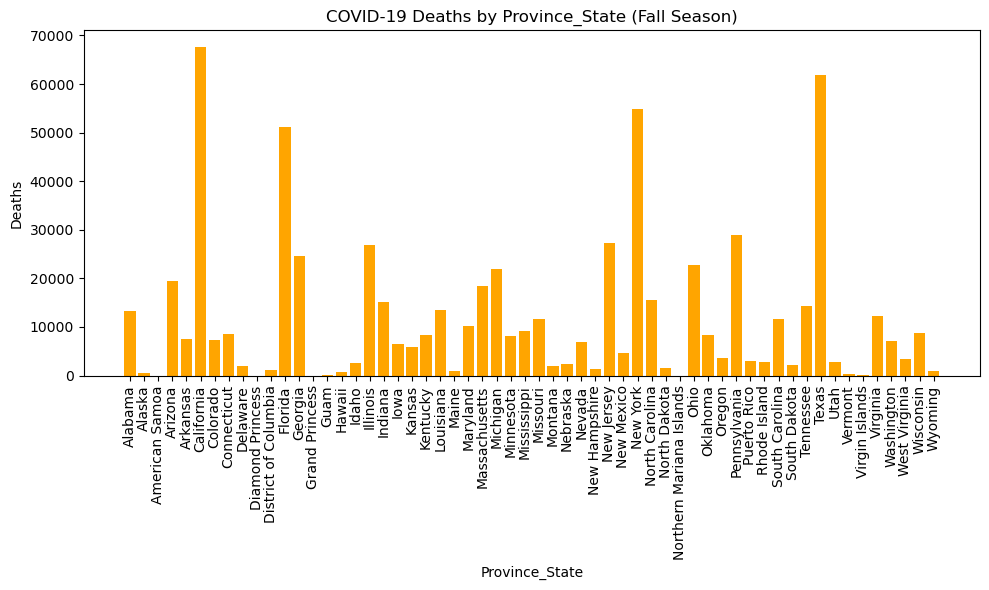

In [32]:
import matplotlib.pyplot as plt

# Access the dataframe
df = dataframes_by_season['fall'][0]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Province_State'], df['Deaths'], color='orange')
plt.xlabel('Province_State')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths by Province_State (Fall Season)')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


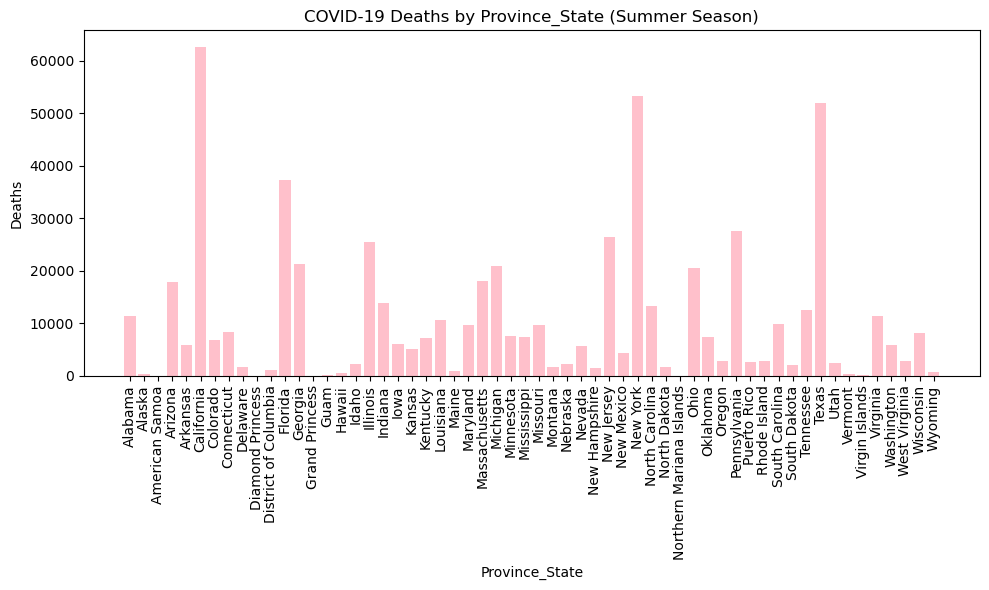

In [31]:
# Access the dataframe
df = dataframes_by_season['summer'][0]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Province_State'], df['Deaths'], color='pink')
plt.xlabel('Province_State')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths by Province_State (Summer Season)')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


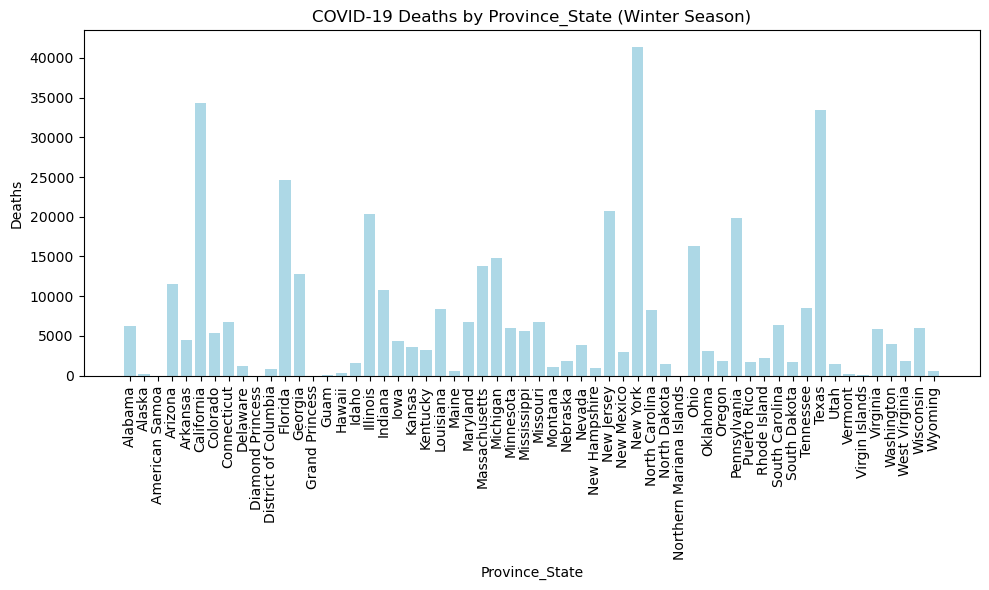

In [33]:
# Access the dataframe
df = dataframes_by_season['winter'][0]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Province_State'], df['Deaths'], color='lightblue')
plt.xlabel('Province_State')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths by Province_State (Winter Season)')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


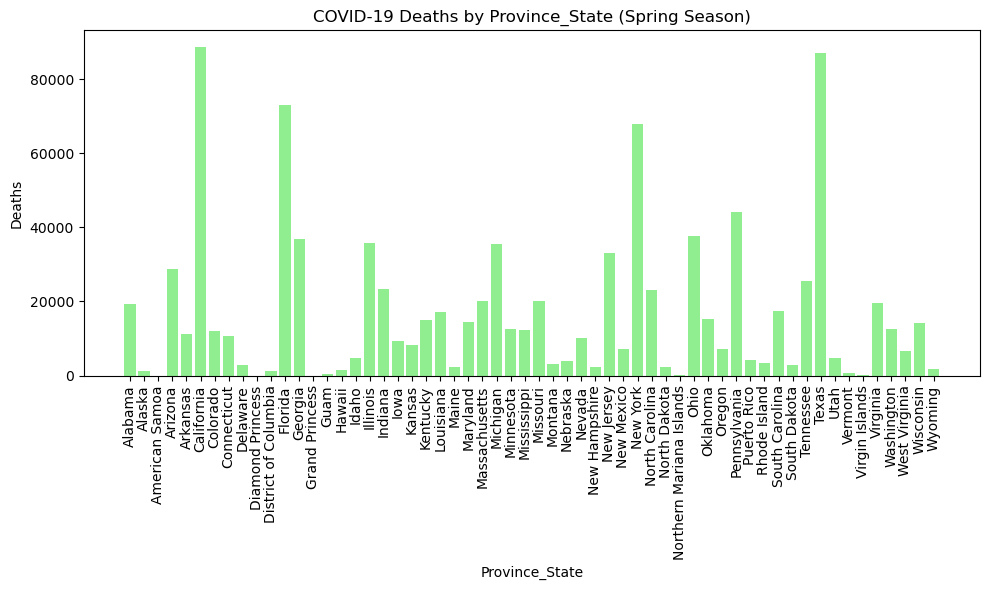

In [34]:
# Access the dataframe
df = dataframes_by_season['spring'][0]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Province_State'], df['Deaths'], color='lightgreen')
plt.xlabel('Province_State')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths by Province_State (Spring Season)')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


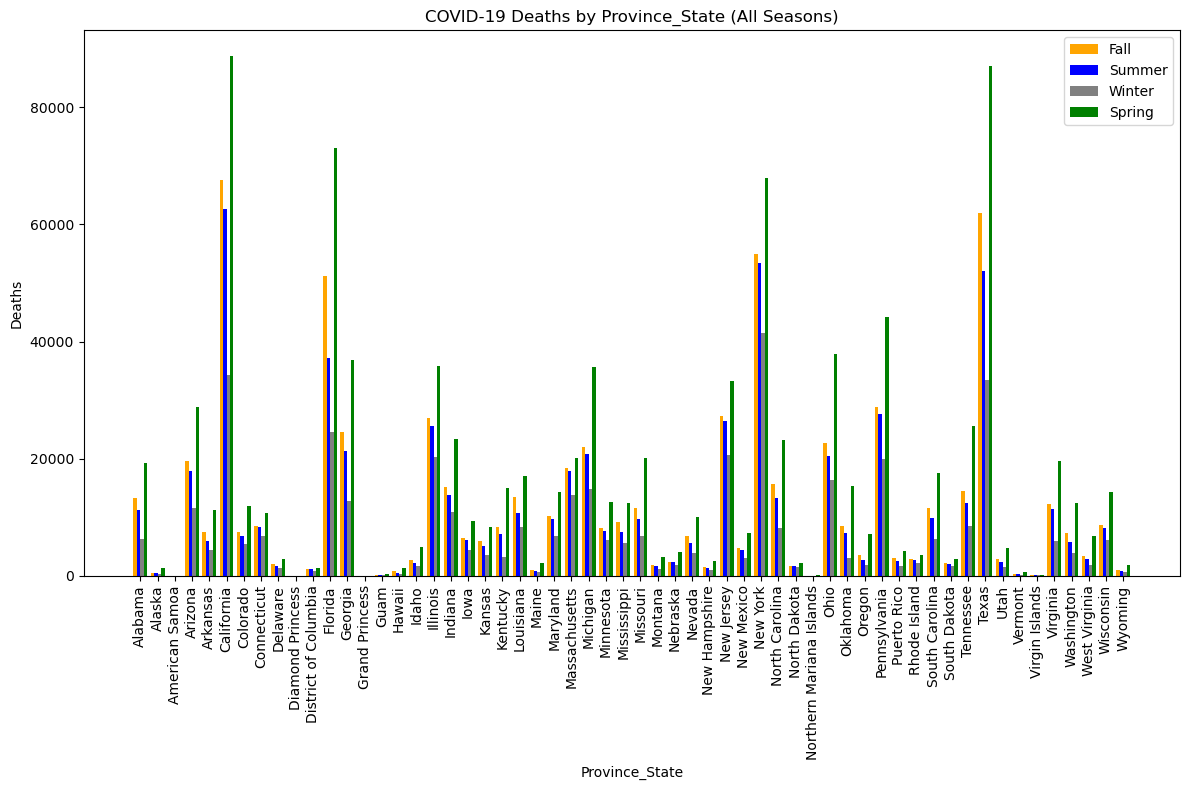

In [36]:
import numpy as np

# Access the dataframes
fall_df = dataframes_by_season['fall'][0]
summer_df = dataframes_by_season['summer'][0]
winter_df = dataframes_by_season['winter'][0]
spring_df = dataframes_by_season['spring'][0]

# Set up the figure
plt.figure(figsize=(12, 8))

# Define the positions of the bars
x = np.arange(len(fall_df['Province_State']))  # the label locations
width = 0.2  # the width of the bars

# Plotting data
plt.bar(x - 0.3, fall_df['Deaths'], width, color='orange', label='Fall')
plt.bar(x - 0.1, summer_df['Deaths'], width, color='blue', label='Summer')
plt.bar(x + 0.1, winter_df['Deaths'], width, color='gray', label='Winter')
plt.bar(x + 0.3, spring_df['Deaths'], width, color='green', label='Spring')

# Add labels and title
plt.xlabel('Province_State')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths by Province_State (All Seasons)')
plt.xticks(x, fall_df['Province_State'], rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



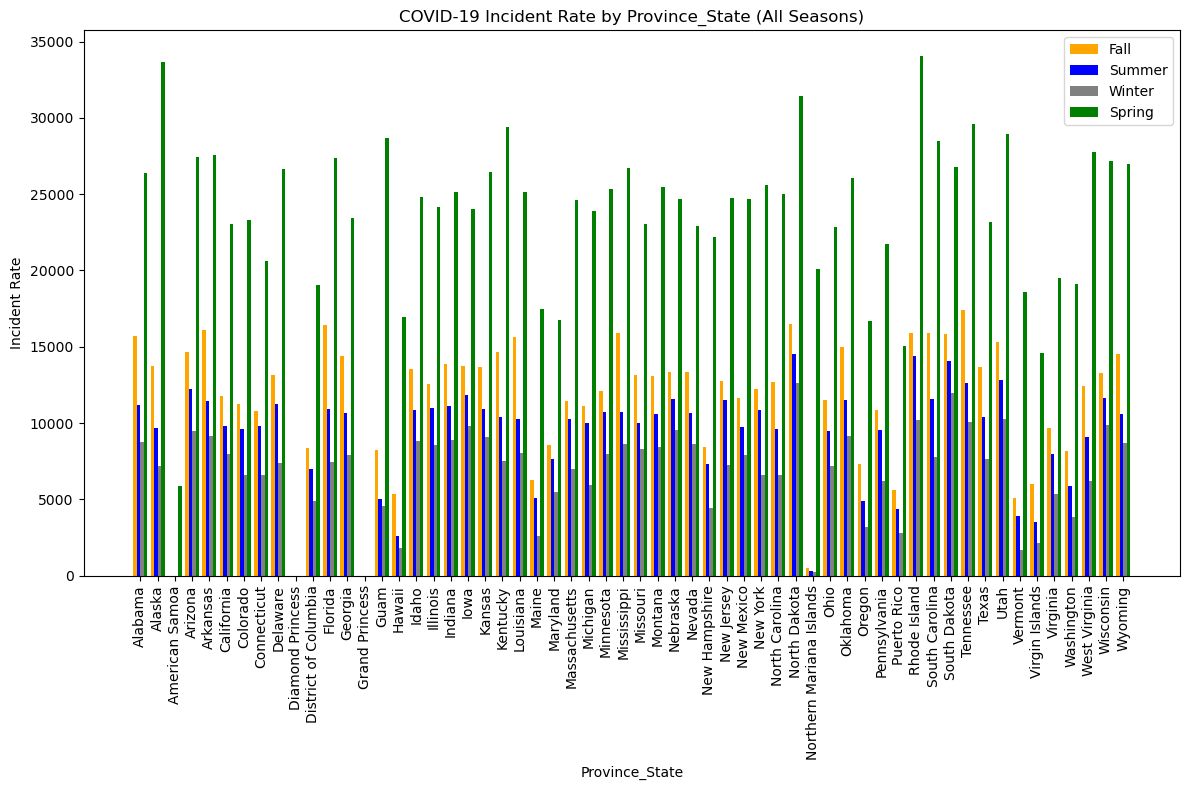

In [41]:
# Access the dataframes
fall_df = dataframes_by_season['fall'][0]
summer_df = dataframes_by_season['summer'][0]
winter_df = dataframes_by_season['winter'][0]
spring_df = dataframes_by_season['spring'][0]

# Set up the figure
plt.figure(figsize=(12, 8))

# Define the positions of the bars
x = np.arange(len(fall_df['Province_State']))  # the label locations
width = 0.2  # the width of the bars

# Plotting data
plt.bar(x - 0.3, fall_df['Incident_Rate'], width, color='orange', label='Fall')
plt.bar(x - 0.1, summer_df['Incident_Rate'], width, color='blue', label='Summer')
plt.bar(x + 0.1, winter_df['Incident_Rate'], width, color='gray', label='Winter')
plt.bar(x + 0.3, spring_df['Incident_Rate'], width, color='green', label='Spring')

# Add labels and title
plt.xlabel('Province_State')
plt.ylabel('Incident Rate')
plt.title('COVID-19 Incident Rate by Province_State (All Seasons)')
plt.xticks(x, fall_df['Province_State'], rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

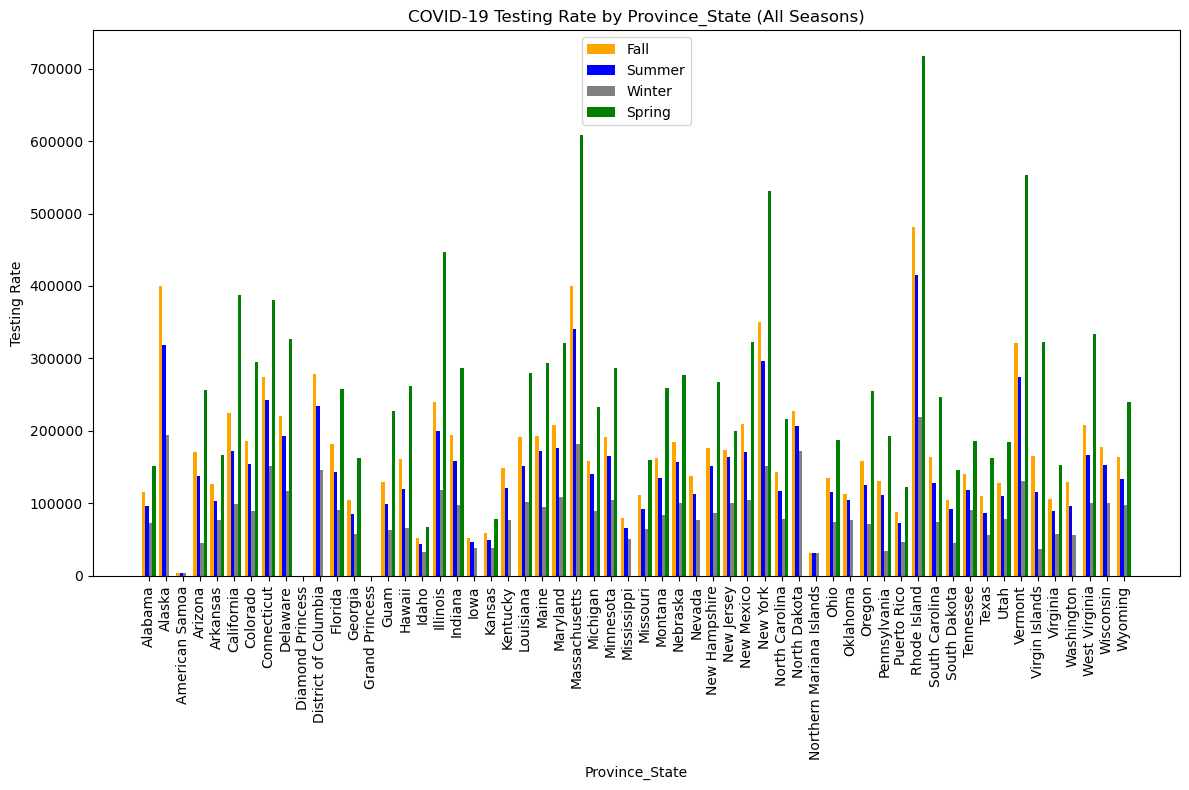

In [40]:
import numpy as np

# Access the dataframes
fall_df = dataframes_by_season['fall'][0]
summer_df = dataframes_by_season['summer'][0]
winter_df = dataframes_by_season['winter'][0]
spring_df = dataframes_by_season['spring'][0]

# Set up the figure
plt.figure(figsize=(12, 8))

# Define the positions of the bars
x = np.arange(len(fall_df['Province_State']))  # the label locations
width = 0.2  # the width of the bars

# Plotting data
plt.bar(x - 0.3, fall_df['Testing_Rate'], width, color='orange', label='Fall')
plt.bar(x - 0.1, summer_df['Testing_Rate'], width, color='blue', label='Summer')
plt.bar(x + 0.1, winter_df['Testing_Rate'], width, color='gray', label='Winter')
plt.bar(x + 0.3, spring_df['Testing_Rate'], width, color='green', label='Spring')

# Add labels and title
plt.xlabel('Province_State')
plt.ylabel('Testing Rate')
plt.title('COVID-19 Testing Rate by Province_State (All Seasons)')
plt.xticks(x, fall_df['Province_State'], rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

